In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [19]:
df = sns.load_dataset('flights')


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [21]:
df


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [22]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%b')


In [23]:
df = df.drop(['year', 'month'], axis=1)


In [24]:
df.index = df.date
df = df.drop('date', axis=1)


In [25]:
df


,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [26]:
sns.set_style('darkgrid')


<AxesSubplot:xlabel='date'>

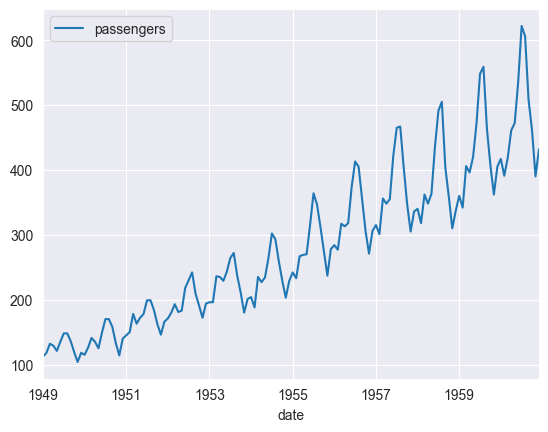

In [27]:
df.plot()


Widać, że w latach 1949-1960 ilość pasażerów zwiększała się.


Zauważalna jet również sezonowość, miesiące zimniejsze oznaczają mniejszą ilość pasażerówn, z kolei miesiące cieplejsze większą ich liczbę.


In [28]:
df['MA'] = df.rolling(window=12).mean()


<AxesSubplot:xlabel='date'>

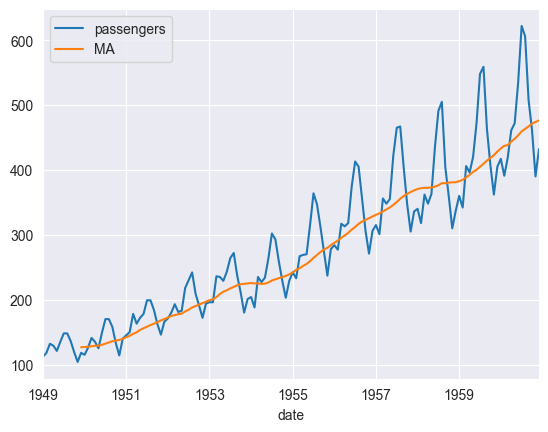

In [29]:
df.plot()


Na wykresie powyżej zamieszczone są ilości pasażerów poszczególnych miesiącach, jak i roczna średnia ruchoma pasażerów.


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose


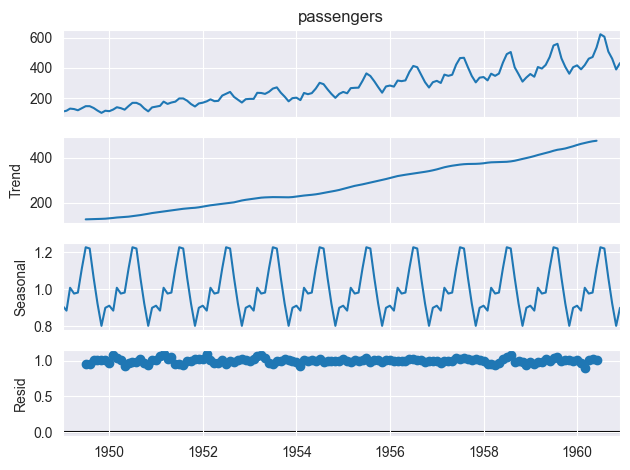

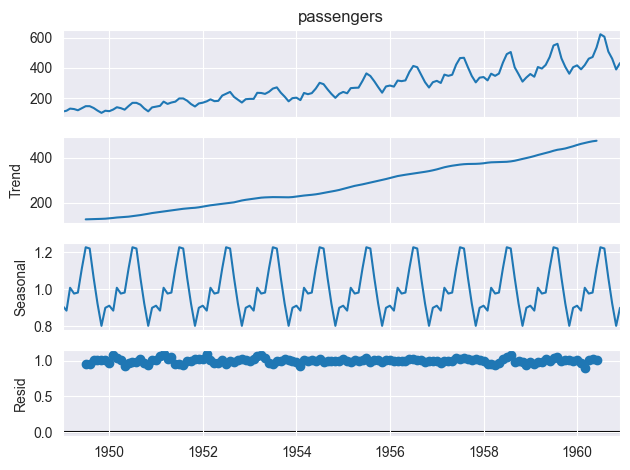

In [31]:
result = seasonal_decompose(df.passengers, model='multiplicative')
result.plot()


Widać, że zależność ilości pasażerów w czasie można podielić na 3 elementy: trend, sezonowość oraz residua(błędy).


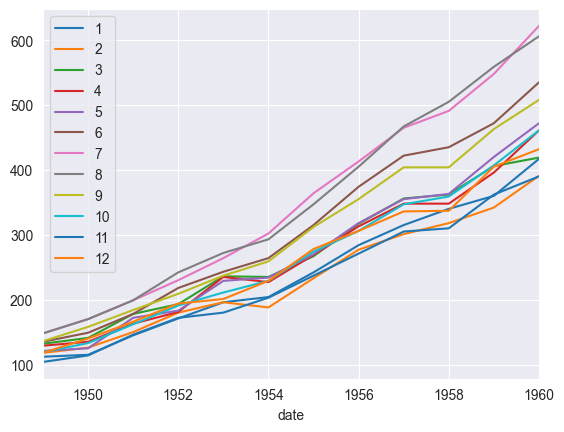

In [32]:
fig, ax = plt.subplots()

for month in range(1, 13):
    df[df.index.month==month].plot(y='passengers', ax=ax, label=month)


Z wykresu powyżej wynika, że jakwięcej pasażerów obsłużono w lipcu, a najmniej w lutym.
